# Pokémon Strength Analysis: Highest Attack & Special Attack from Gen 1-6

## Introduction

The question is simple: Who is the strongest Pokémon of each generation? 

In the vast realm of Pokémon games, strength is often determined by the base Attack or Special Attack points that each Pokémon possesses. Understanding the intricate dynamics of type advantages, where Water attacks may carry double the power against Fire types, further emphasizes the significance of a Pokémon's Attack points in battles. This analysis delves into the world of Pokémon strength, exploring and identifying the mightiest contenders in each generation based on their Attack points.

---


## Python Libraries Import

   For data manipulation and analysis, numerical operations, statistical data visualization and creating plots and charts.

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Import

I obtained the dataset as a download from [Kaggle.](https://www.kaggle.com/datasets/abcsds/pokemon)

In [13]:
df = pd.read_csv("pokemon_data.csv")
df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


### Legend:
- **Name:** The name of the Pokémon species.
- **Type 1:** Primary elemental type of the Pokémon .
- **Type 2:** Secondary elemental type of the Pokémon (as some have two types).
- **HP:** Hit Points, representing the Pokémon's health.
- **Attack:** Physical Attack stat indicating the strength of physical moves.
- **Defense:** Physical Defense stat indicating the ability to resist physical attacks.
- **Sp. Atk:** Special Attack stat indicating the strength of special (elemental) moves.
- **Sp. Def:** Special Defense stat indicating the ability to resist special attacks.
- **Speed:** Speed stat determining the order of turns in battle.
- **Generation:** The generation in which the Pokémon was introduced.
- **Legendary:** Indicates whether the Pokémon is classified as legendary (True/False).

---

*Fun Fact: Did you know that Pokémon, initially released in Japan in 1996, became an international sensation in 1998, captivating the hearts of millions worldwide? Its enduring popularity has not only stood the test of time but has also contributed significantly to Nintendo's success, generating a staggering estimated revenue of over $150 billion.*

*Personal Anecdote:
In 1999, at the age of 9, I received Pokémon Blue and a GameBoy Color from my father in Nashville, Tennessee—an introduction to a world that continues to capture hearts worldwide. Little did I know that this introduction to the Pokémon universe would mark the beginning of countless hours of joyous exploration and battles.*

# Data Cleaning
Removing the empty values in Type 2 rows as not every Pokémon has a secondary Type.

In [14]:
df = df.fillna(' ')

In [15]:
df.shape

(800, 12)

In [16]:
df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [17]:
df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [18]:
df.describe().round(2)

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00
mean,362.81,69.26,79.00,73.84,72.82,71.90,68.28,3.32
std,208.34,25.53,32.46,31.18,32.72,27.83,29.06,1.66
min,1.00,1.00,5.00,5.00,10.00,20.00,5.00,1.00
25%,184.75,50.00,55.00,50.00,49.75,50.00,45.00,2.00
50%,364.50,65.00,75.00,70.00,65.00,70.00,65.00,3.00
75%,539.25,80.00,100.00,90.00,95.00,90.00,90.00,5.00
max,721.00,255.00,190.00,230.00,194.00,230.00,180.00,6.00


# **Legendary vs. Non-Legendary Pokémon Comparison**

Text(0.5, 1.0, 'Number of Legendary Pokémon')

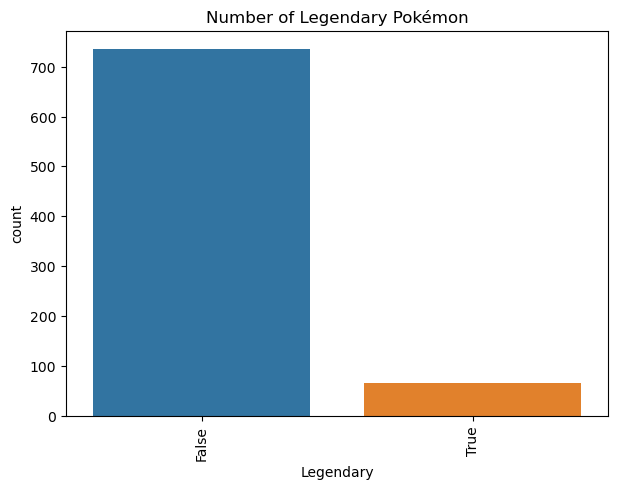

In [19]:
plt.figure(figsize=(7,5))
sns.countplot(x='Legendary', data=df)
plt.xticks(rotation = 90)
plt.title('Number of Legendary Pokémon')

Legendary Pokemon, as evident from the dataset, are scarce. While there are a total of **65**, including various variations, the count drops to **46** when considering only unique legendary Pokemon without any duplicates. This highlights the presence of duplicate entries or variations in the dataset, emphasizing the need for data cleaning and deduplication.

#  Data Filtering
   Sorting based on Legendary, Mega, and Non-Legendary categories.

### Initial Data Filtering

In [20]:
total_legendaries = df[df['Legendary'] == True].shape[0]

# Total count of legendaries
legendary_count_by_generation = df[df['Legendary'] == True].groupby('Generation').size().reset_index(name='Count')

print(f'Total number of Legendary Pokémon: {total_legendaries}')

print('\nCount of Legendary Pokémon in each generation:')
print(legendary_count_by_generation)

Total number of Legendary Pokémon: 65

Count of Legendary Pokémon in each generation:
   Generation  Count
0           1      6
1           2      5
2           3     18
3           4     13
4           5     15
5           6      8


### Deep Data Filtering

In [21]:
df['Name'] = df['Name'].str.strip()

# Remove duplicates
undesired_substrings = ['Mega', 'Primal', 'Attack', 'Defense', 'Speed', 'Incarnate', 'Origin', 'Sky','Unbound', 'Size', 'Mode', 'Cloak', 'White', 'Black']

df_filtered = df[~df['Name'].str.contains('|'.join(undesired_substrings), case=False)]

total_legendaries_filtered = df_filtered[df_filtered['Legendary'] == True].shape[0]

legendary_count_by_generation_filtered = df_filtered[df_filtered['Legendary'] == True].groupby('Generation').size().reset_index(name='Count')

# legendary Pokemon (unique names)
print(f'Total number of Unique Legendary Pokémon: {total_legendaries_filtered}')

print('\nCount of Unique Legendary Pokémon in each generation:')
print(legendary_count_by_generation_filtered)

Total number of Unique Legendary Pokémon: 46

Count of Unique Legendary Pokémon in each generation:
   Generation  Count
0           1      4
1           2      5
2           3     10
3           4     11
4           5     10
5           6      6


### Final Filtered Pokémon List

In [22]:
print(df_filtered[df_filtered['Legendary'] == True]['Name'])


156                   Articuno
157                     Zapdos
158                    Moltres
162                     Mewtwo
262                     Raikou
263                      Entei
264                    Suicune
269                      Lugia
270                      Ho-oh
414                   Regirock
415                     Regice
416                  Registeel
417                     Latias
419                     Latios
421                     Kyogre
423                    Groudon
425                   Rayquaza
427                    Jirachi
428        Deoxys Normal Forme
537                       Uxie
538                    Mesprit
539                      Azelf
540                     Dialga
541                     Palkia
542                    Heatran
543                  Regigigas
544     Giratina Altered Forme
549                    Darkrai
550         Shaymin Land Forme
552                     Arceus
553                    Victini
699                   Cobalion
700     

### Excluded Pokémon duplicates

In [23]:
excluded_names = set(df['Name']).difference(set(df_filtered['Name']))

print('\nExcluded Names:')
print(excluded_names)


Excluded Names:
{'Mega Diancie', 'Mega Beedrill', 'Gourgeist Super Size', 'Mega Mewtwo X', 'Pumpkaboo Large Size', 'Yanmega', 'Deoxys Defense Forme', 'Mega Swampert', 'Wormadam Plant Cloak', 'Mega Metagross', 'Mega Rayquaza', 'Mega Lucario', 'Mega Mewtwo Y', 'Mega Gyarados', 'Black Kyurem', 'Mega Glalie', 'Mega Blaziken', 'Primal Groudon', 'Pumpkaboo Super Size', 'Tornadus Incarnate Forme', 'Mega Houndoom', 'Mega Gardevoir', 'Gourgeist Large Size', 'Mega Camerupt', 'Mega Altaria', 'Mega Latias', 'Mega Alakazam', 'Mega Salamence', 'Mega Manectric', 'Deoxys Attack Forme', 'Mega Tyranitar', 'Landorus Incarnate Forme', 'Pumpkaboo Average Size', 'Wormadam Trash Cloak', 'Mega Ampharos', 'Mega Slowbro', 'Mega Kangaskhan', 'Mega Steelix', 'Shaymin Sky Forme', 'Mega Sceptile', 'Mega Scizor', 'Mega Absol', 'Mega Charizard X', 'Mega Charizard Y', 'Mega Medicham', 'Mega Lopunny', 'Darmanitan Standard Mode', 'Wormadam Sandy Cloak', 'Mega Banette', 'Mega Mawile', 'Hoopa Unbound', 'Mega Gengar', 'Go

# Total Number of Pokémon Across Six Generations

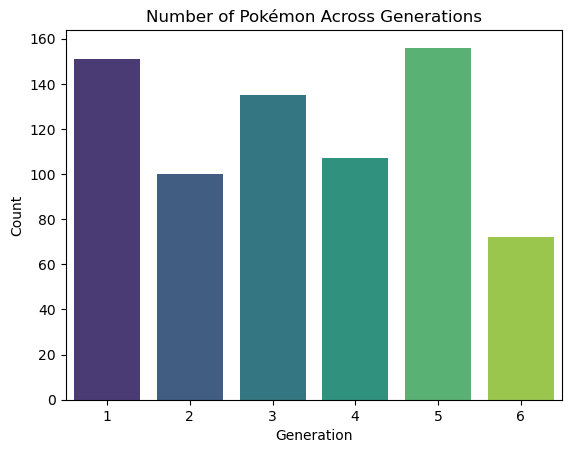

In [24]:
generation_count = {'Generation': ['1', '2', '3', '4', '5', '6'],
                    'Number of Pokémon': [151, 100, 135, 107, 156, 72]}

bar_plot = sns.barplot(x='Generation', y='Number of Pokémon', data=generation_count, palette='viridis')

plt.title('Number of Pokémon Across Generations')
plt.xlabel('Generation')
plt.ylabel('Count')

plt.show()



As of 2022, the total number of Pokémon has reached 1025. However, this analysis is tailored to Pokémon from Generation 1 to 6, encompassing a total of 721 species. You can refer to the [full list on Wikipedia](https://en.wikipedia.org/wiki/List_of_Pok%C3%A9mon) for a comprehensive overview.

# Pokémon Types 
## Primary

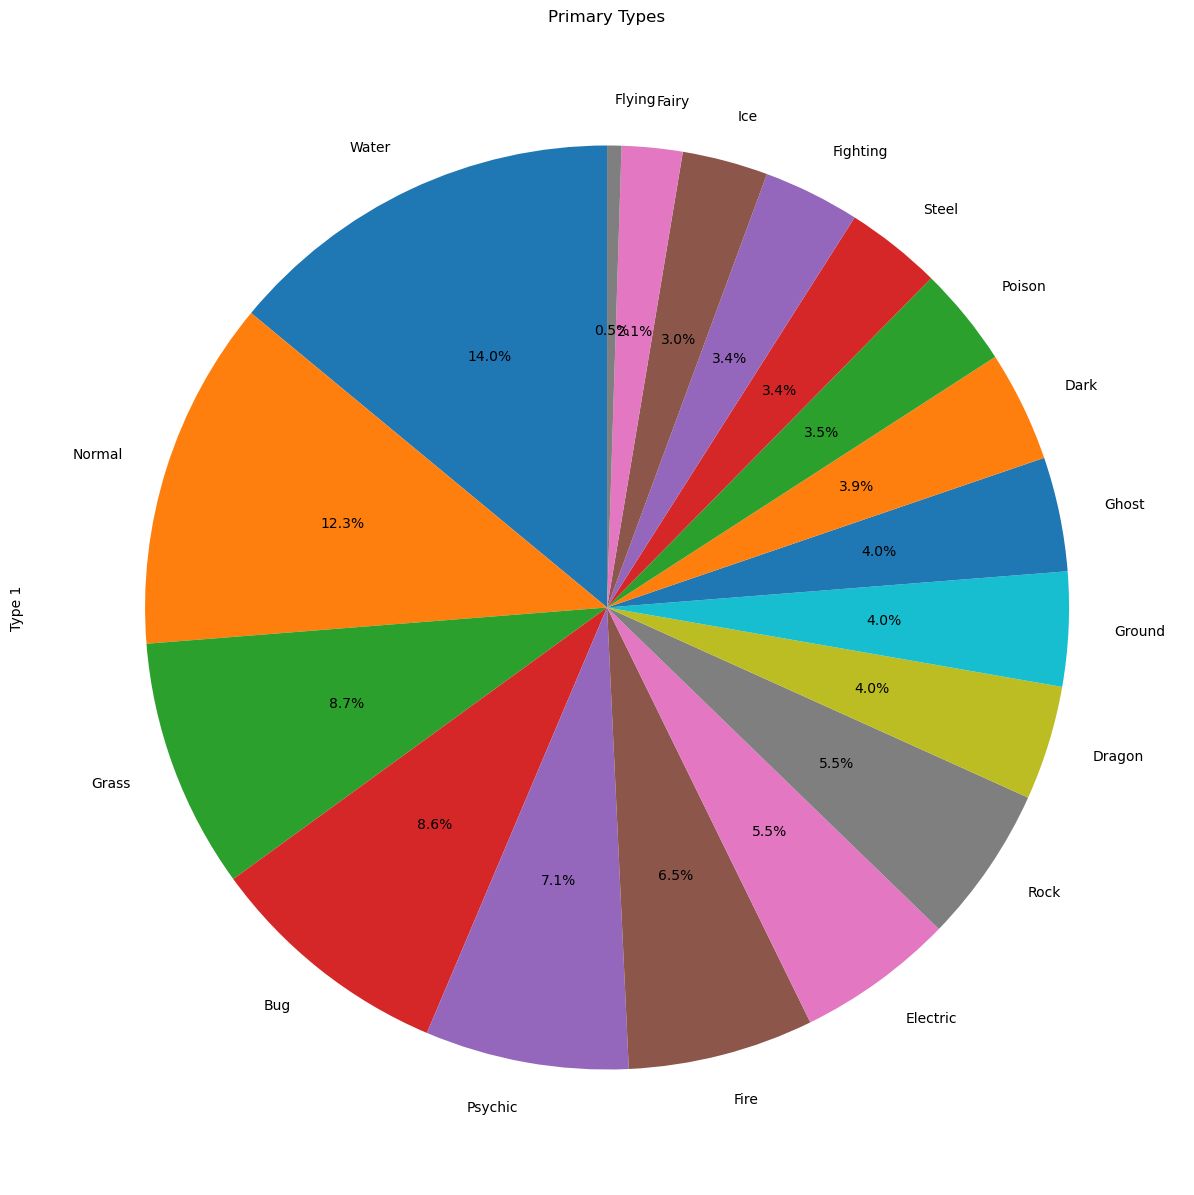

In [25]:
# Pokémon Type 1
plt.figure(figsize=(15, 15))
df['Type 1'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Primary Types')
plt.show()


## Secondary

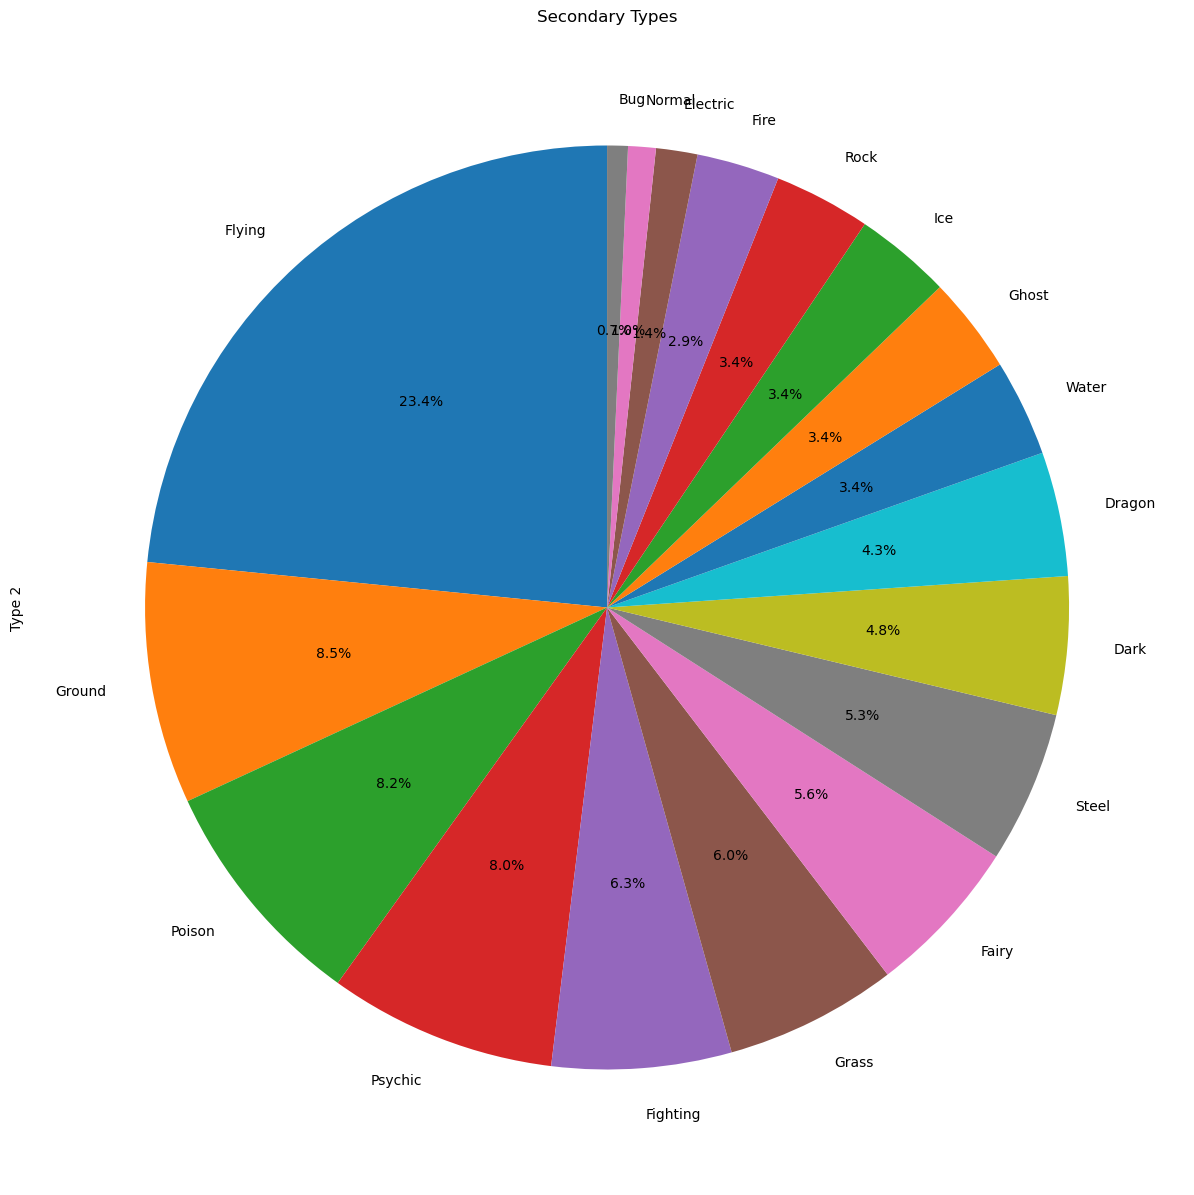

In [26]:
# Pokémon Type 2
plt.figure(figsize=(15, 15))

# Filter out missing values and empty strings before plotting
filtered_df = df[(df['Type 2'].notnull()) & (df['Type 2'] != ' ')]
filtered_df['Type 2'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)

plt.title('Secondary Types')
plt.show()

# Pokémon Attack Analysis

### Top Legendary Pokémon Across Generations


                      Name  Attack   Type 1    Type 2  Generation
Generation                                                       
1            Mega Mewtwo X     190  Psychic  Fighting           1
2           Mega Heracross     185      Bug  Fighting           2
3           Primal Groudon     180   Ground      Fire           3
4            Mega Garchomp     170   Dragon    Ground           4
5             Black Kyurem     170   Dragon       Ice           5
6             Mega Diancie     160     Rock     Fairy           6


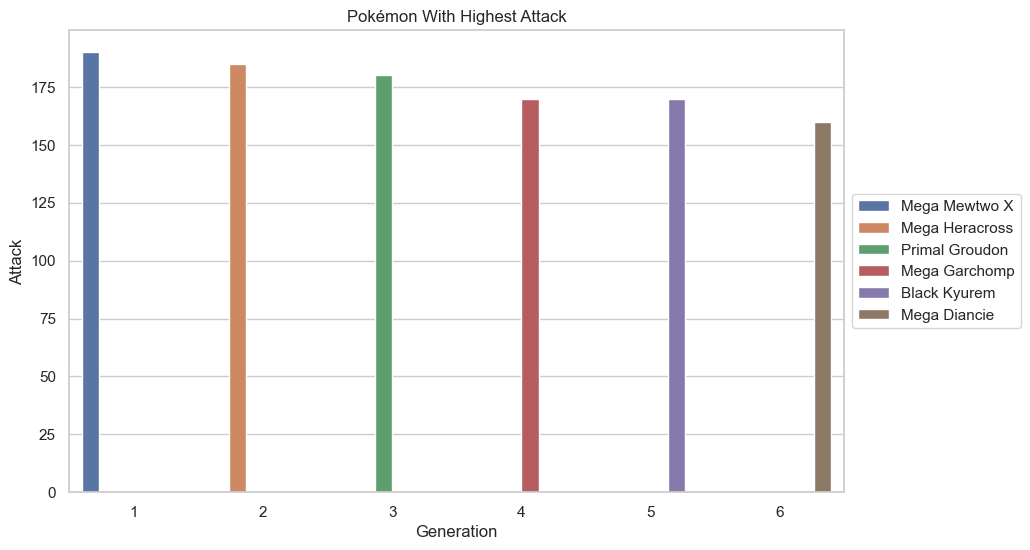

In [27]:
top_attackers = df.groupby('Generation').apply(lambda x: x.loc[x['Attack'].idxmax()])

print(top_attackers[['Name', 'Attack', 'Type 1', 'Type 2', 'Generation']])

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Generation', y='Attack', hue='Name', data=top_attackers)
bar_plot.set_title('Pokémon With Highest Attack')
bar_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Typically, the most formidable Pokémon in terms of sheer attacking power fall into the legendary, mega, or primal categories. Their attacks are not only inherently potent but are further augmented, surpassing their already impressive base values. These Pokémon stand out for their exceptional raw strength, making them top picks for executing devastatingly powerful attacks.

### Drop Legendary

In [28]:
# Drop Legendaries

df_no_legendary = df.drop(df[df['Legendary'] == True].index)
df_no_legendary.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 735 entries, 0 to 791
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           735 non-null    int64 
 1   Name        735 non-null    object
 2   Type 1      735 non-null    object
 3   Type 2      735 non-null    object
 4   HP          735 non-null    int64 
 5   Attack      735 non-null    int64 
 6   Defense     735 non-null    int64 
 7   Sp. Atk     735 non-null    int64 
 8   Sp. Def     735 non-null    int64 
 9   Speed       735 non-null    int64 
 10  Generation  735 non-null    int64 
 11  Legendary   735 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


In [29]:
top_attackers = df_no_legendary.groupby('Generation').apply(lambda x: x.loc[x['Attack'].idxmax()])

print(top_attackers[['Name', 'Attack', 'Generation']])


                             Name  Attack  Generation
Generation                                           
1                     Mega Pinsir     155           1
2                  Mega Heracross     185           2
3                    Mega Banette     165           3
4                   Mega Garchomp     170           4
5                         Haxorus     147           5
6           Aegislash Blade Forme     150           6


Even in the absence of legendary Pokémon, those with Mega forms consistently secure top positions.

### Top Non-Legendary Pokémon Across Generations

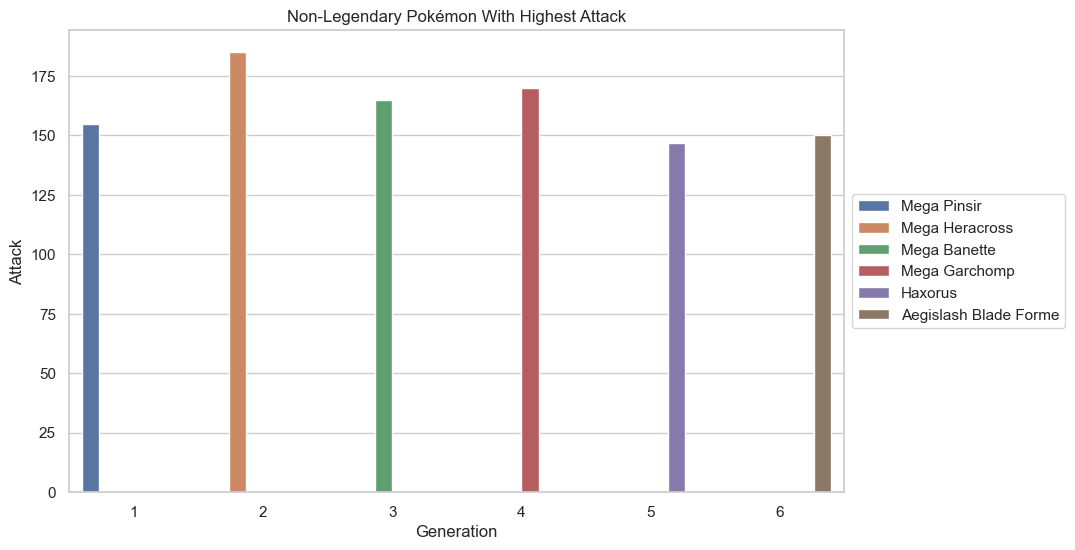

In [30]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Generation', y='Attack', hue='Name', data=top_attackers, dodge=True)
bar_plot.set_title('Non-Legendary Pokémon With Highest Attack')

bar_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


### Drop Legendary and Mega

                             Name  Attack  Generation
Generation                                           
1                       Dragonite     134           1
2                       Tyranitar     134           2
3                         Slaking     160           3
4                       Rampardos     165           4
5                         Haxorus     147           5
6           Aegislash Blade Forme     150           6


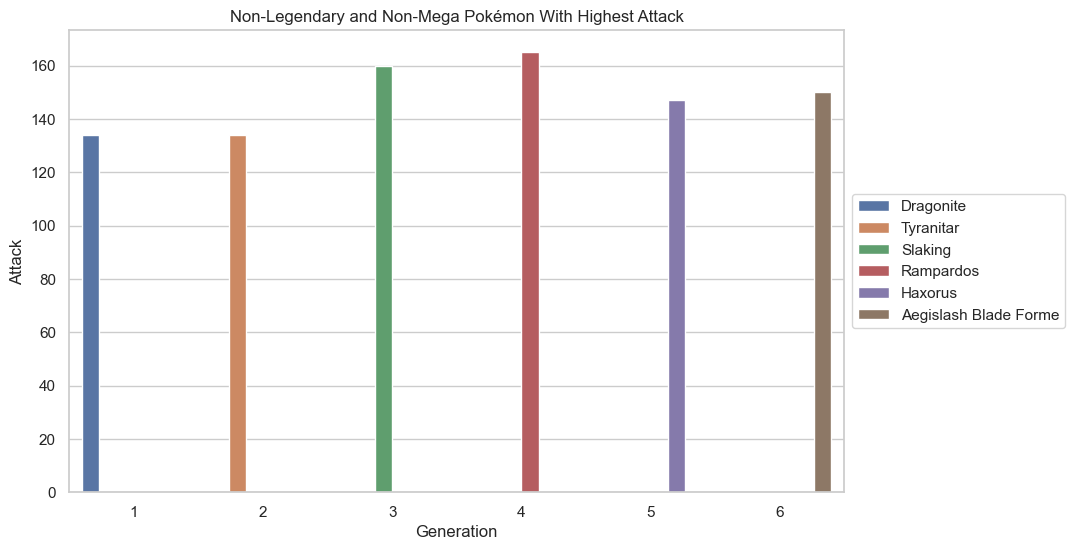

In [31]:
# Sort with no Mega and Legendary
df_no_mega_legendary = df[(df['Name'].str.contains('Mega') == False) & (df['Legendary'] == False)]

top_non_mega_legendary_attackers = df_no_mega_legendary.groupby('Generation').apply(lambda x: x.loc[x['Attack'].idxmax()])

print(top_non_mega_legendary_attackers[['Name', 'Attack', 'Generation']])

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bar_plot_non_mega_legendary = sns.barplot(x='Generation', y='Attack', hue='Name', data=top_non_mega_legendary_attackers, dodge=True)
bar_plot_non_mega_legendary.set_title('Non-Legendary and Non-Mega Pokémon With Highest Attack')

bar_plot_non_mega_legendary.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

# Special Attack Analysis

                     Name  Sp. Atk    Type 1  Type 2  Generation
Generation                                                      
1           Mega Mewtwo Y      194   Psychic                   1
2           Mega Ampharos      165  Electric  Dragon           2
3           Primal Kyogre      180     Water                   3
4                  Dialga      150     Steel  Dragon           4
5            White Kyurem      170    Dragon     Ice           5
6           Hoopa Unbound      170   Psychic    Dark           6


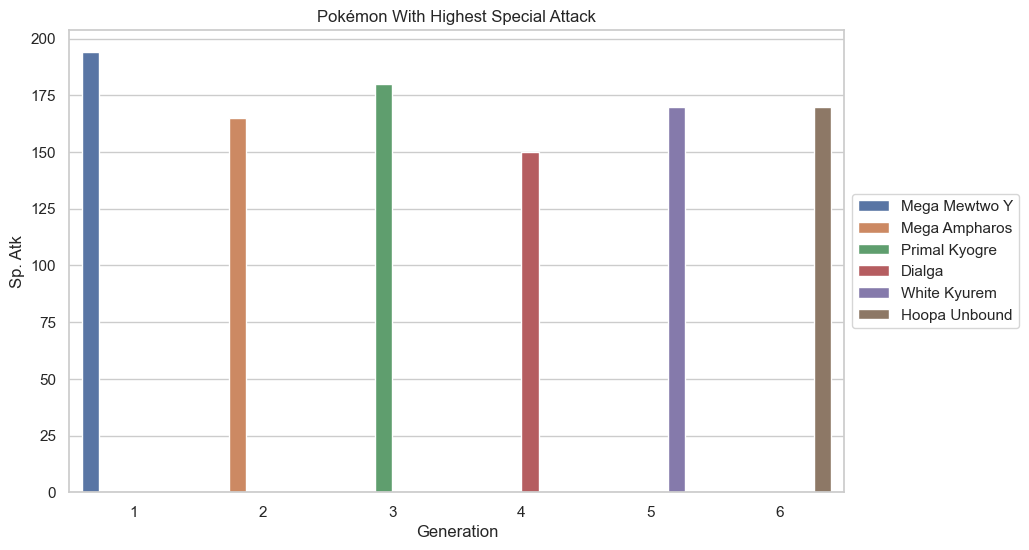

In [32]:
top_special_attackers = df.groupby('Generation').apply(lambda x: x.loc[x['Sp. Atk'].idxmax()])

# Displaying the top Special Attackers stats
print(top_special_attackers[['Name', 'Sp. Atk', 'Type 1', 'Type 2', 'Generation']])

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Generation', y='Sp. Atk', hue='Name', data=top_special_attackers, dodge=True)
bar_plot.set_title('Pokémon With Highest Special Attack')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Adjust legend position
plt.show()

### Drop Legendary

                             Name  Sp. Atk    Type 1  Type 2  Generation
Generation                                                              
1                   Mega Alakazam      175   Psychic                   1
2                   Mega Ampharos      165  Electric  Dragon           2
3                  Mega Gardevoir      165   Psychic   Fairy           3
4                    Mega Lucario      140  Fighting   Steel           4
5                      Chandelure      145     Ghost    Fire           5
6           Aegislash Blade Forme      150     Steel   Ghost           6


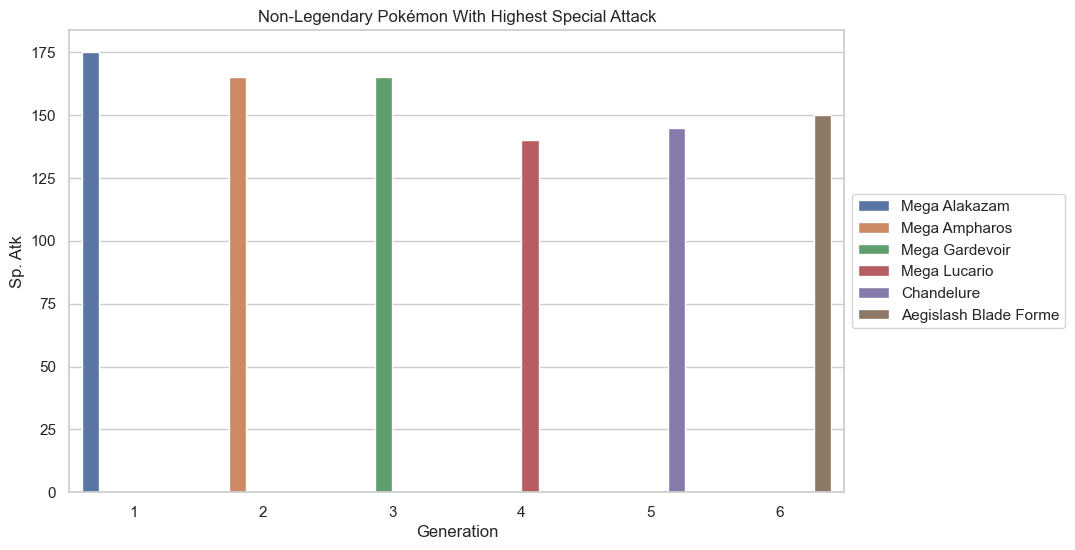

In [33]:
df_no_legendary = df.drop(df[df['Legendary'] == True].index)

top_special_attackers_no_legendary = df_no_legendary.groupby('Generation').apply(lambda x: x.loc[x['Sp. Atk'].idxmax()])

# Displaying top Special Attackers (excluding Legendary) stats
print(top_special_attackers_no_legendary[['Name', 'Sp. Atk', 'Type 1', 'Type 2', 'Generation']])

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bar_plot_no_legendary = sns.barplot(x='Generation', y='Sp. Atk', hue='Name', data=top_special_attackers_no_legendary, dodge=True)
bar_plot_no_legendary.set_title('Non-Legendary Pokémon With Highest Special Attack')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Drop Legendary & Mega

                             Name  Sp. Atk   Type 1 Type 2  Generation
Generation                                                            
1                        Alakazam      135  Psychic                  1
2                          Espeon      130  Psychic                  2
3                       Gardevoir      125  Psychic  Fairy           3
4                       Porygon-Z      135   Normal                  4
5                      Chandelure      145    Ghost   Fire           5
6           Aegislash Blade Forme      150    Steel  Ghost           6


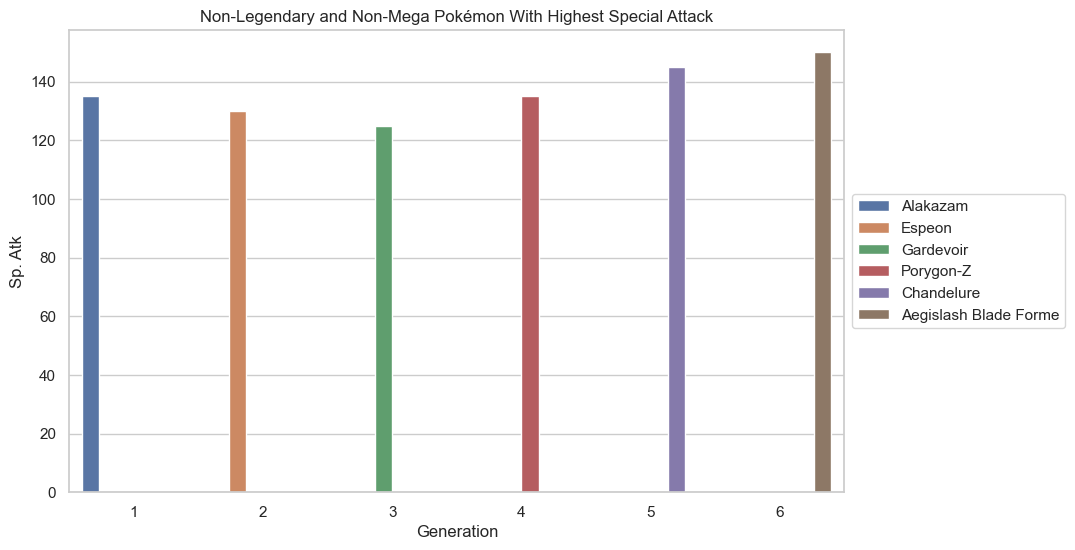

In [34]:
df_no_mega_legendary = df[(df['Name'].str.contains('Mega') == False) & (df['Legendary'] == False)]

top_special_attackers_no_mega_legendary = df_no_mega_legendary.groupby('Generation').apply(lambda x: x.loc[x['Sp. Atk'].idxmax()])

# Displaying the top Special Attackers (excluding Mega and Legendary) stats
print(top_special_attackers_no_mega_legendary[['Name', 'Sp. Atk', 'Type 1', 'Type 2', 'Generation']])

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bar_plot_no_mega_legendary = sns.barplot(x='Generation', y='Sp. Atk', hue='Name', data=top_special_attackers_no_mega_legendary, dodge=True)
bar_plot_no_mega_legendary.set_title('Non-Legendary and Non-Mega Pokémon With Highest Special Attack')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# 

## Top Attack by Type

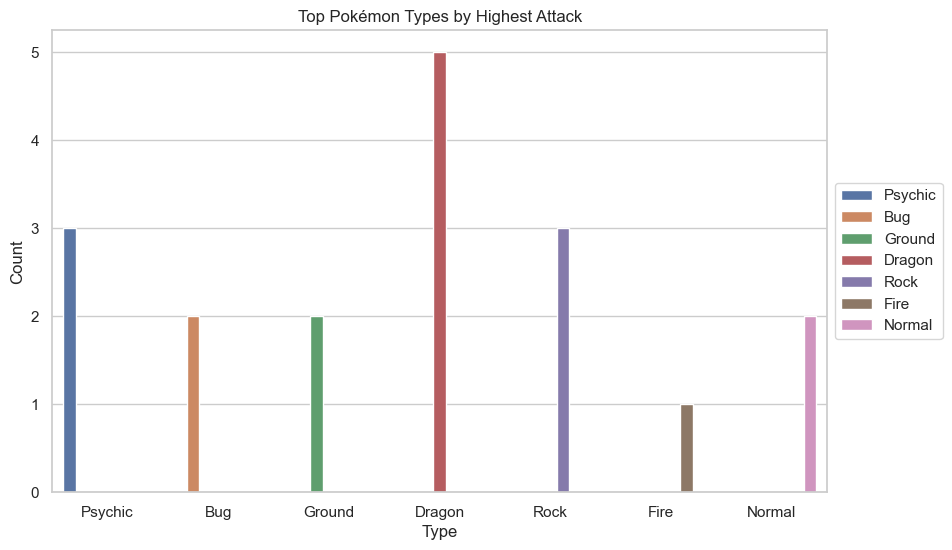

In [35]:
top_regular_attackers = df.groupby('Generation').apply(lambda x: x.loc[x['Attack'].idxmax()])

# Identify the top legendary attackers
top_legendary_attackers = df[df['Legendary'] == True].groupby('Generation').apply(lambda x: x.loc[x['Attack'].idxmax()])

# Identify the top mega attackers
top_mega_attackers = df[df['Name'].str.contains('Mega')].groupby('Generation').apply(lambda x: x.loc[x['Attack'].idxmax()])

# Organize top attackers into one DataFrame
combined_top_attackers = pd.concat([top_regular_attackers, top_legendary_attackers, top_mega_attackers])

# Completed Top Attackers by Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Type 1', hue='Type 1', data=combined_top_attackers)
plt.title('Top Pokémon Types by Highest Attack')
plt.xlabel('Type')
plt.ylabel('Count')
plt.legend(title='Types')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Top 5 Legendary

                      Name  Attack    Type 1    Type 2  Generation
0            Mega Mewtwo X     190   Psychic  Fighting           1
1            Mega Mewtwo Y     150   Psychic                     1
2                   Mewtwo     110   Psychic                     1
3                  Moltres     100      Fire    Flying           1
4                   Zapdos      90  Electric    Flying           1
5                    Ho-oh     130      Fire    Flying           2
6                    Entei     115      Fire                     2
7                    Lugia      90   Psychic    Flying           2
8                   Raikou      85  Electric                     2
9                  Suicune      75     Water                     2
10          Primal Groudon     180    Ground      Fire           3
11           Mega Rayquaza     180    Dragon    Flying           3
12     Deoxys Attack Forme     180   Psychic                     3
13           Primal Kyogre     150     Water                  

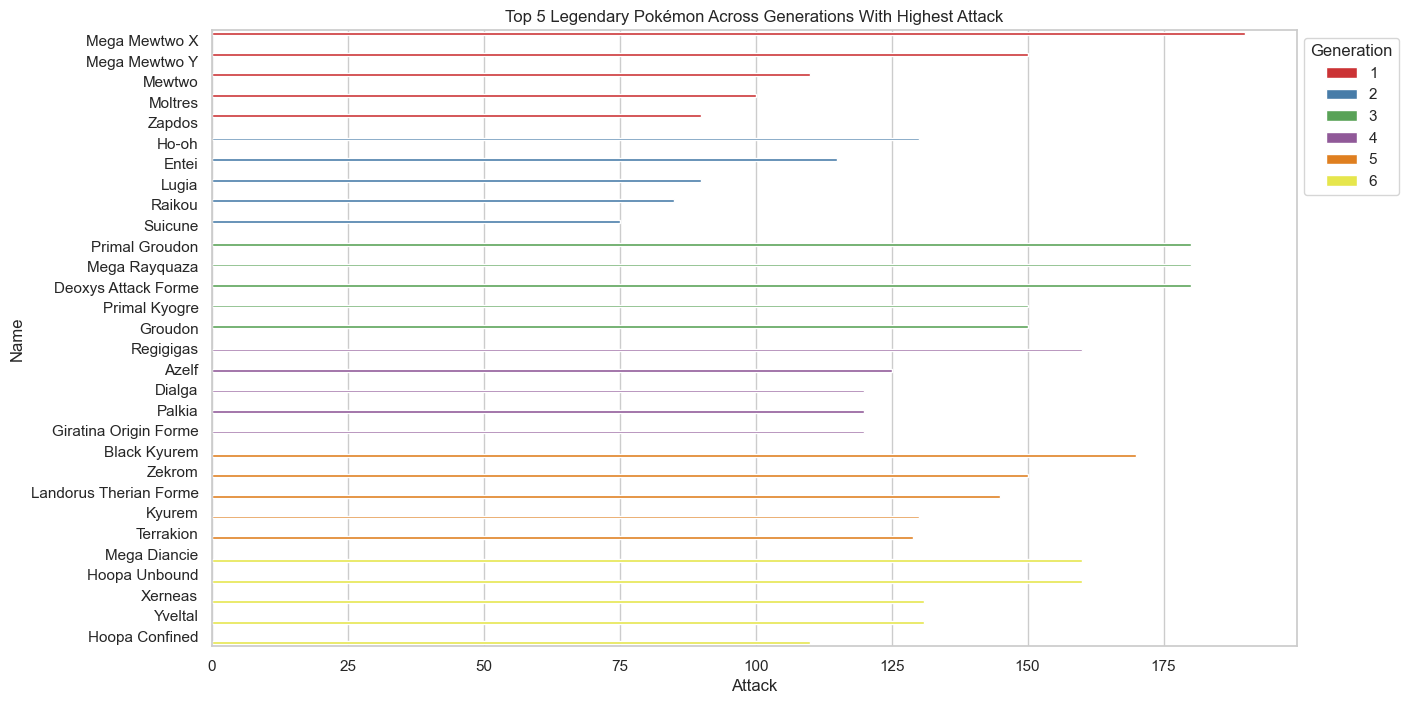

In [36]:
df['Name'] = df['Name'].str.strip()

# Group by 'Generation' and apply a function to get the top 5 by Attack for Legendary Pokémon
top_legendary_attackers = df[df['Legendary']].groupby('Generation').apply(lambda x: x.nlargest(5, 'Attack')).reset_index(drop=True)

# Fill NaN values with blank strings in 'Type 1' and 'Type 2' columns
top_legendary_attackers[['Type 1', 'Type 2']] = top_legendary_attackers[['Type 1', 'Type 2']]

# Display the top 5 Legendary Attackers in each generation
print(top_legendary_attackers[['Name', 'Attack', 'Type 1', 'Type 2', 'Generation']])

# Plotting the top 5 Legendary Attackers
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
bar_plot_legendary = sns.barplot(y='Name', x='Attack', hue='Generation', data=top_legendary_attackers, dodge=True, palette='Set1', orient='h')
bar_plot_legendary.set_title('Top 5 Legendary Pokémon Across Generations With Highest Attack')

plt.legend(title='Generation', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


## Top 5 Non-Legendary and Non-Mega

          Name  Attack    Type 1    Type 2  Generation
0    Dragonite     134    Dragon    Flying           1
1      Machamp     130  Fighting                     1
2      Kingler     130     Water                     1
3       Rhydon     130    Ground      Rock           1
4      Flareon     130      Fire                     1
5    Tyranitar     134      Rock      Dark           2
6       Scizor     130       Bug     Steel           2
7     Ursaring     130    Normal                     2
8    Heracross     125       Bug  Fighting           2
9     Granbull     120     Fairy                     2
10     Slaking     160    Normal                     3
11   Salamence     135    Dragon    Flying           3
12   Metagross     135     Steel   Psychic           3
13     Breloom     130     Grass  Fighting           3
14       Absol     130      Dark                     3
15   Rampardos     165      Rock                     4
16   Rhyperior     140    Ground      Rock           4
17    Garc

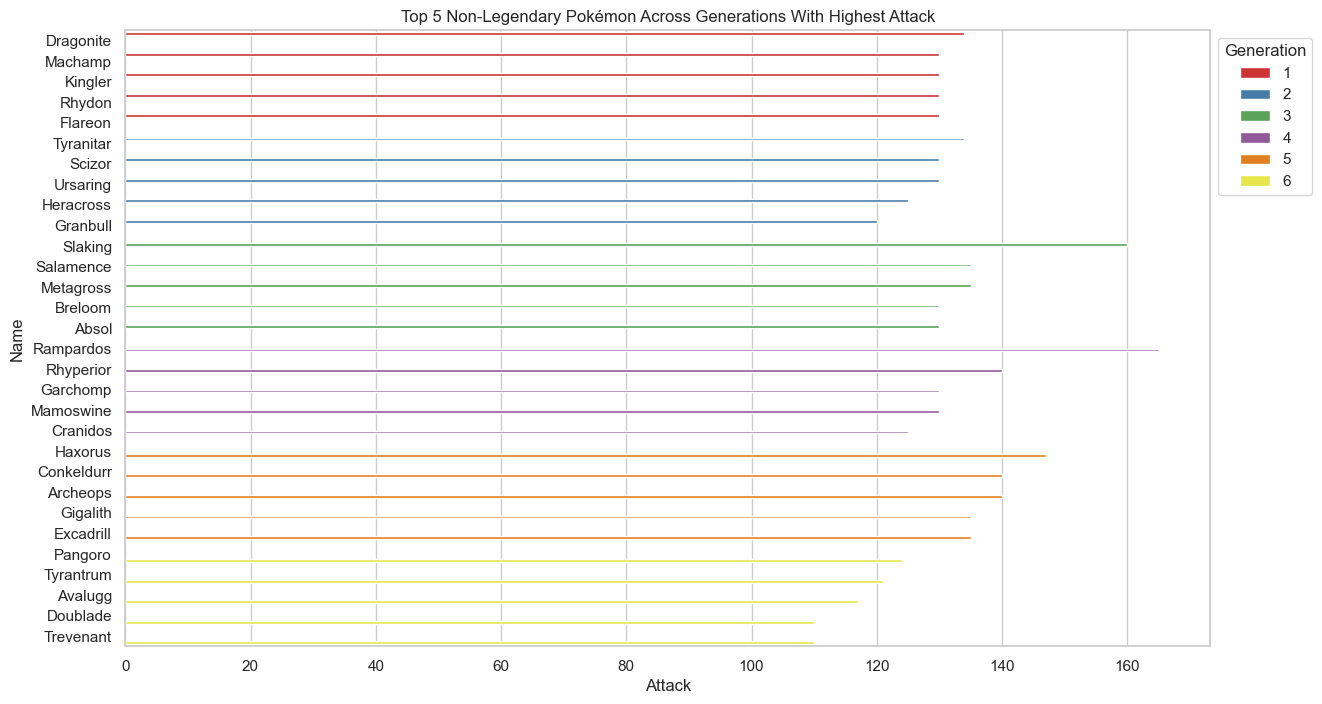

In [37]:
df['Name'] = df['Name'].str.strip()

# List
undesired_substrings = ['Primal', 'Forme', 'Confined', 'Unbound', 'Size', 'Mode', 'Cloak', 'Rotom']

# Filtering the list to remove Mega and Legendary
df_filtered = df[~df['Name'].str.contains('|'.join(undesired_substrings), case=False)]

df_no_mega_legendary = df_filtered[(df_filtered['Name'].str.contains('Mega') == False) & (df_filtered['Legendary'] == False)]

top_attackers_no_mega_legendary = df_no_mega_legendary.groupby('Generation').apply(lambda x: x.nlargest(5, 'Attack')).reset_index(drop=True)

print(top_attackers_no_mega_legendary[['Name', 'Attack', 'Type 1', 'Type 2', 'Generation']])

# Plotting the top 5 Attackers (excluding Mega and Legendary)
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
bar_plot_no_mega_legendary = sns.barplot(y='Name', x='Attack', hue='Generation', data=top_attackers_no_mega_legendary, dodge=True, palette='Set1', orient='h')
bar_plot_no_mega_legendary.set_title('Top 5 Non-Legendary Pokémon Across Generations With Highest Attack')

plt.legend(title='Generation', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

# Conclusion

Our analysis explored the vibrant realm of Pokémon to analyze the top attackers and special attackers spanning the initial six generations. Across the historical history of Pokémon battles, Dragon-type, Psychic-type, and Ice-type attacks stood out as fan favorites, securing their spots as frequent picks in the competitive leagues. It's not surprising to see Mewtwo constantly being the best, but take him away and the battlefield evens out a lot more.

Diving deeper, our exploration highlighted the prevalence of specific Pokémon Types with the highest strength. The Dragon Type emerged as a consistent powerhouse, excelling in both physical and special attacks. Psychic, Rock, Bug, Ground, Normal, and Fire Types also played significant roles, each contributing to the varied tapestry of Pokémon strength with its own unique flair.


---

# Socials

Follow me on:
- GitHub: [Nichols-Tech](https://github.com/Nichols-Tech)
- LinkedIn: [MrNichols](https://www.linkedin.com/in/mrnichols/)
- Medium: [Nichols-Tech](https://medium.com/@nichols.tech)
- Instagram: [Nichols.Tech](https://instagram.com/Nichols.Tech)
